<a href="https://colab.research.google.com/github/Noramon22/Local-Repository/blob/main/portfolio_01_%E0%B8%84%E0%B8%AD%E0%B8%A3%E0%B9%8C%E0%B8%AA%E0%B8%9F%E0%B8%A3%E0%B8%B5Bigdata_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

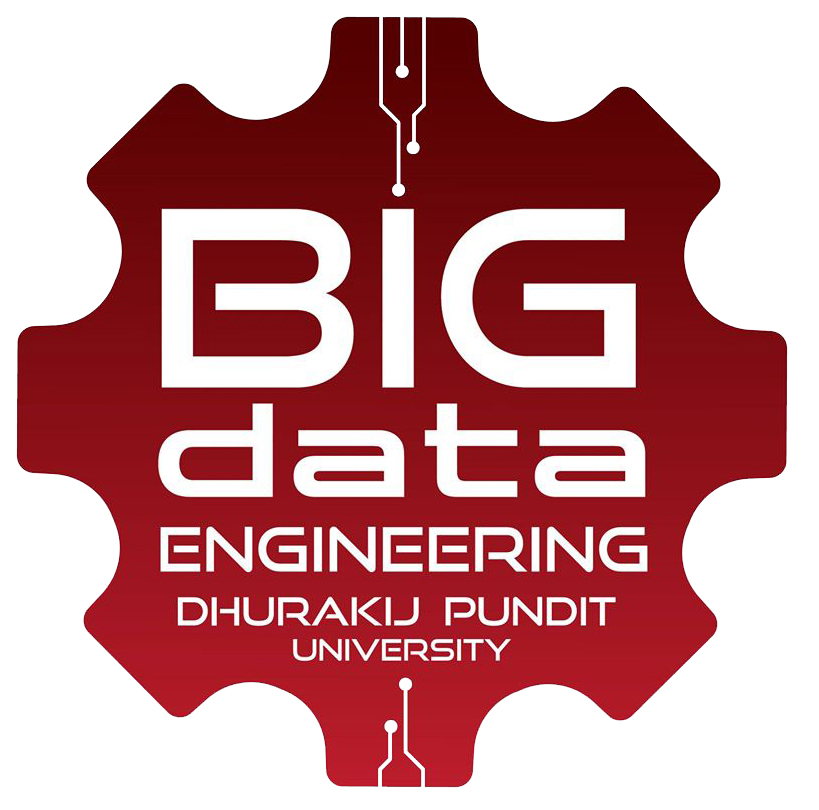

# Markowitz: Modern portfolio theory

## Big Data Engineering - BD, CITE, DPU

Tanapat Kamsaiin 
BD'60

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from pandas_datareader import data as pdr

plt.style.use('fivethirtyeight')

In [ ]:
# download assets
assets = ['ptt.bk','kbank.bk','tsla','amzn']
start="2015-01-03"
end="2021-06-16"

data = pdr.get_data_yahoo(assets, start, end)

In [ ]:
data.head()

Attributes  Adj Close                         ...      Volume                       
Symbols        ptt.bk    kbank.bk       tsla  ...    kbank.bk        tsla       amzn
Date                                          ...                                   
2015-01-05  24.562086  185.910706  42.018002  ...   8257400.0  26842500.0  2774200.0
2015-01-06  25.185888  180.840424  42.256001  ...  14103900.0  31309500.0  3519000.0
2015-01-07  26.043613  184.220596  42.189999  ...   8669900.0  14842000.0  2640300.0
2015-01-08  26.511461  192.671082  42.124001  ...   8947000.0  17212500.0  3088400.0
2015-01-09  26.355511  193.516144  41.332001  ...   6858000.0  23341500.0  2592400.0

[5 rows x 24 columns]

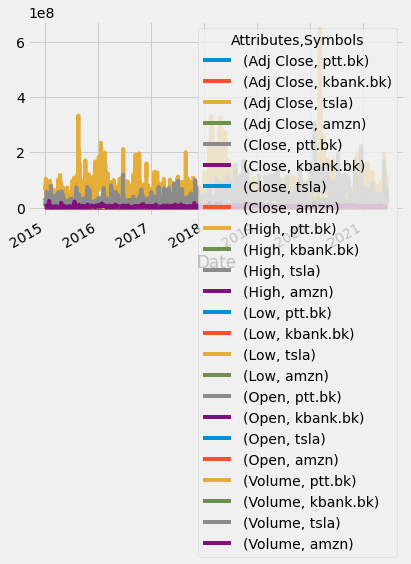

In [ ]:
data.plot()

In [ ]:
data = data['Adj Close']
data.head()

Symbols,ptt.bk,kbank.bk,tsla,amzn
Date,,,,
2015-01-05,24.562086,185.910706,42.018002,302.190002
2015-01-06,25.185888,180.840424,42.256001,295.290009
2015-01-07,26.043613,184.220596,42.189999,298.420013
2015-01-08,26.511461,192.671082,42.124001,300.459991
2015-01-09,26.355511,193.516144,41.332001,296.929993


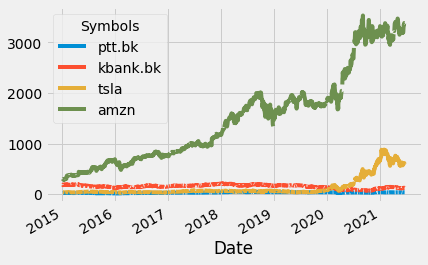

In [ ]:
data.plot()

In [ ]:
data = data.dropna(axis=0)

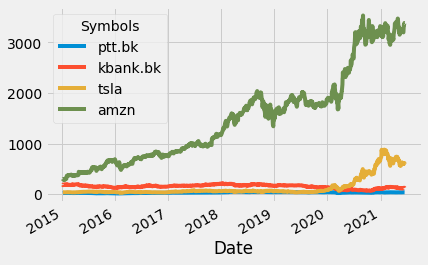

In [ ]:
data.plot()

In [ ]:
# calculate daily and annual returns of the assets
returns_daily = data.pct_change()
returns_annual = returns_daily.mean() * 252
returns_annual*100

Symbols
ptt.bk      13.511089
kbank.bk    -1.610986
tsla        60.370773
amzn        45.073463
dtype: float64

In [ ]:
# get daily and covariance of returns of assets.
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 252
cov_annual*100

Symbols,ptt.bk,kbank.bk,tsla,amzn
Symbols,,,,
ptt.bk,10.046075,4.132015,2.795817,1.541804
kbank.bk,4.132015,9.994109,1.217597,1.010082
tsla,2.795817,1.217597,32.667431,6.330096
amzn,1.541804,1.010082,6.330096,9.980254


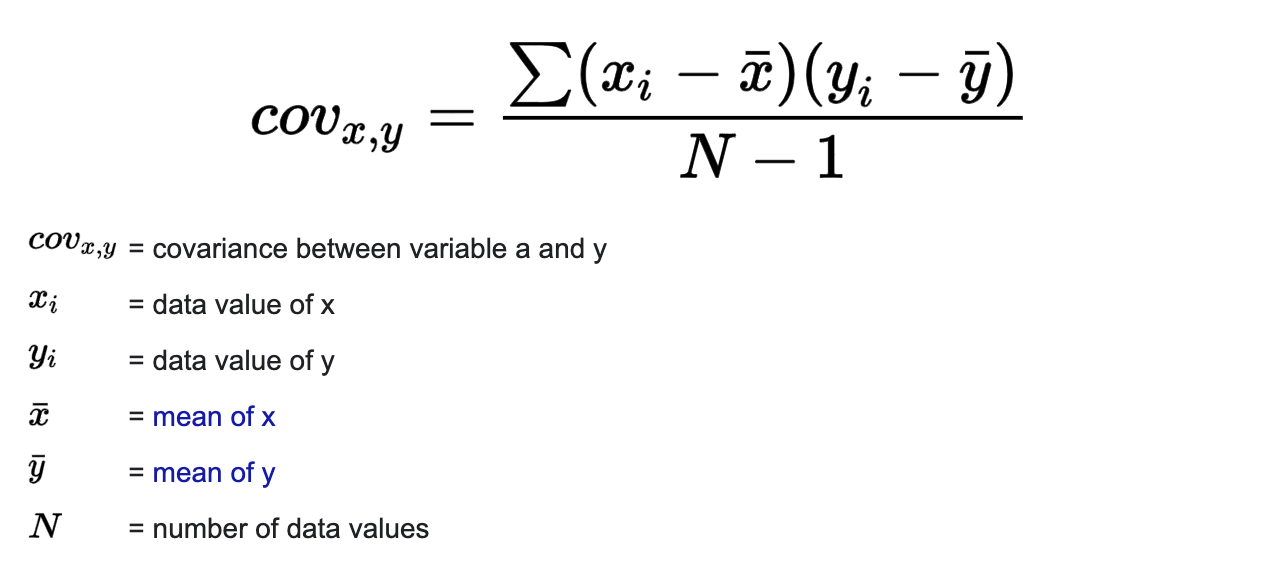

#### Covariance 

Covariance คือค่าสถิติที่ใช้วัดความสัมพันธ์ของตัวแปรสองตัว (เกิดจากคำว่า Co + Variance) 
เรียกสั้นๆว่า cov มีค่าเป็นได้ทั้งบวกและลบ โดยเครื่องหมาย +/- ในทางสถิติแค่บอกทิศทางความสัมพันธ์

Positive covariance แปลว่า x ↑ y ↑ (หรือ x ↓ y ↓ เปลี่ยนแปลงในทิศทางเดียวกัน)

Negative covariance แปลว่า x ↑ y ↓ (หรือ x ↓ y ↑ เปลี่ยนแปลงในทิศทางตรงข้ามกัน)


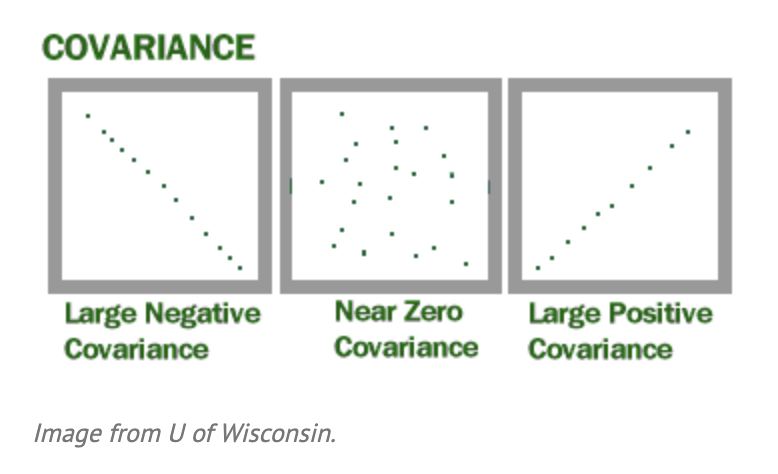

# Modern Portfolio theory method.

In [ ]:
# สร้างตัวแปรรอรับค่าจากการคำนวนรอไว้ก่อน
port_returns = []
port_volatility = []
stock_weights = []

# ตั้งค่าจำนวนการผสมพอร์ตการลงทุนที่ต้องการ
num_assets = len(assets)
num_portfolios = 5000

# การคำนวณตัวแปรเพื่อใช้ในการผสมสัดส่วนพอร์ตการลงทุน
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

In [ ]:
# สร้างผลตอบแทนของพอร์ตจาก returns และ Volatility 
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# กำหนดน้ำหนักพอร์ตการลงทุนแต่ละสินทรัพย์ให้อยู่ในตัวแปร portfolio
for counter,symbol in enumerate(assets):  
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# ตั้งค่าตัวแปร df เพื่อให้รับค่า portfolio ให้สามารถอ่านได้ง่ายขึ้นในรูปแบบ DataFrame
df = pd.DataFrame(portfolio)

In [ ]:
df

,Returns,Volatility,ptt.bk Weight,kbank.bk Weight,tsla Weight,amzn Weight
0,0.367916,0.333628,0.011089,0.334387,0.501975,0.152548
1,0.227868,0.259472,0.418170,0.279846,0.259931,0.042053
2,0.369420,0.250997,0.224463,0.081987,0.181772,0.511778
3,0.340858,0.270624,0.125779,0.257611,0.327418,0.289192
4,0.165284,0.248137,0.485982,0.330387,0.144970,0.038662
...,...,...,...,...,...,...
4995,0.272492,0.225875,0.273131,0.244827,0.145516,0.336526
4996,0.293470,0.277579,0.335937,0.224147,0.349125,0.090792
4997,0.342128,0.249023,0.319090,0.088752,0.219248,0.372910
4998,0.096218,0.269369,0.005881,0.790789,0.107961,0.095369


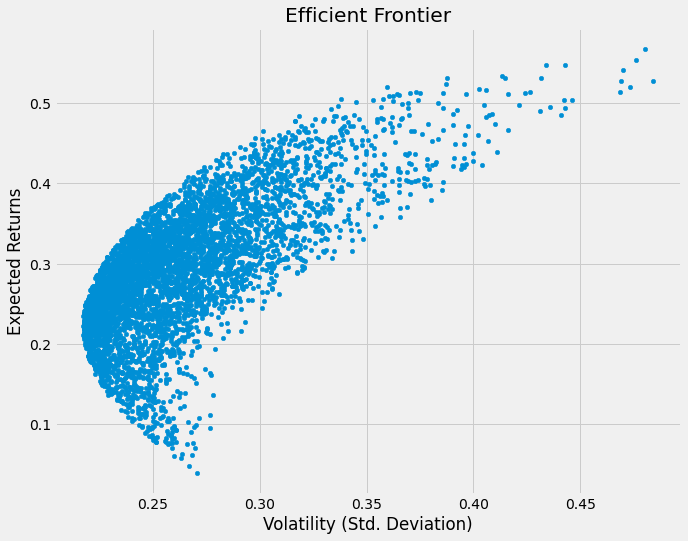

In [ ]:
# plot the efficient frontier with a scatter plot
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# Efficient frontier visualisation.

In [ ]:
# สร้างตัวแปรรอรับค่าจากการคำนวนรอไว้ก่อน
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# ตั้งค่าจำนวนการผสมพอร์ตการลงทุนที่ต้องการ
num_assets = len(assets)
num_portfolios = 5000

# การคำนวณตัวแปรเพื่อใช้ในการผสมสัดส่วนพอร์ตการลงทุน
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# Set random seed เพื่อให้ได้ผลลัพธ์เช่นเดิม
np.random.seed(19)

In [ ]:
# สร้างผลตอบแทนของพอร์ตจาก returns และ Volatility 
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# กำหนดน้ำหนักพอร์ตการลงทุนแต่ละสินทรัพย์ให้อยู่ในตัวแปร portfolio
for counter,symbol in enumerate(assets):  
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# ตั้งค่าตัวแปร df เพื่อให้รับค่า portfolio ให้สามารถอ่านได้ง่ายขึ้นในรูปแบบ DataFrame
df = pd.DataFrame(portfolio)

In [ ]:
df

,Returns,Volatility,Sharpe Ratio,ptt.bk Weight,kbank.bk Weight,tsla Weight,amzn Weight
0,0.419049,0.312623,1.340430,0.207360,0.066329,0.423133,0.303178
1,0.298191,0.237740,1.254276,0.223822,0.244287,0.210128,0.321763
2,0.171276,0.224595,0.762602,0.350020,0.380495,0.056534,0.212951
3,0.225018,0.223173,1.008269,0.310410,0.313276,0.120984,0.255331
4,0.331900,0.265206,1.251481,0.315901,0.140835,0.304752,0.238512
...,...,...,...,...,...,...,...
4995,0.323107,0.255136,1.266412,0.237446,0.203965,0.278061,0.280527
4996,0.230278,0.221055,1.041722,0.267151,0.328105,0.111371,0.293374
4997,0.289454,0.242304,1.194589,0.159120,0.314252,0.233036,0.293592
4998,0.391823,0.285152,1.374084,0.021194,0.219609,0.328821,0.430376


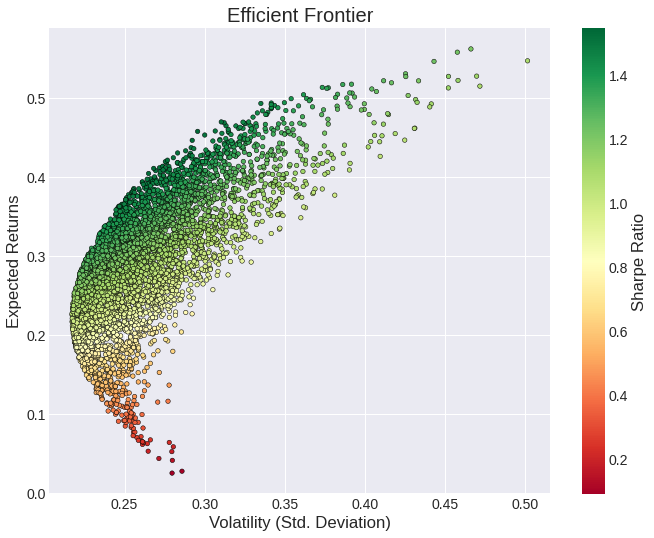

In [ ]:
# จัดเรียงลำดับชื่อคอลัมน์เพื่อความสะดวกในการอ่านค่า
columns = ['Sharpe Ratio', 'Returns', 'Volatility', ] + [stock+' Weight' for stock in assets]

# กำหนดตัวแปร df ให้เรียงคอลัมน์ตามกำหนด
df = df[columns]

# plot frontier, max sharpe & min Volatility values with a scatterplot
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# Find min volatility and max Sharpe ratio from dataframe

In [ ]:
# กำหนดตัวแปรผลลัพธ์ที่ต้องการ
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()
max_returns = df['Returns'].max()

In [ ]:
min_volatility

0.21715302809698728

In [ ]:
max_sharpe

1.5475642943687242

In [ ]:
max_returns

0.5618058403641596

In [ ]:
# กำหนดพอร์ตที่ต้องการแสดงผลบน Efficient frontier
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]
max_return_port = df.loc[df['Returns'] == max_returns]

In [ ]:
sharpe_portfolio

,Sharpe Ratio,Returns,Volatility,ptt.bk Weight,kbank.bk Weight,tsla Weight,amzn Weight
1808,1.547564,0.457459,0.295599,0.084933,0.005745,0.236729,0.672593


In [ ]:
min_variance_port

,Sharpe Ratio,Returns,Volatility,ptt.bk Weight,kbank.bk Weight,tsla Weight,amzn Weight
2575,1.044239,0.22676,0.217153,0.27191,0.307693,0.035895,0.384502


In [ ]:
max_return_port

,Sharpe Ratio,Returns,Volatility,ptt.bk Weight,kbank.bk Weight,tsla Weight,amzn Weight
1436,1.204991,0.561806,0.466233,0.00619,0.0081,0.763574,0.222136


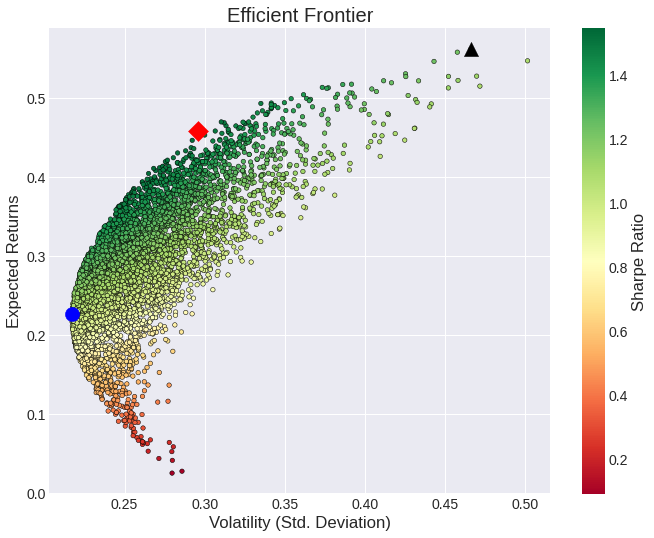

In [ ]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='o', s=200 )
plt.scatter(x=max_return_port['Volatility'], y=max_return_port['Returns'], c='black', marker='^', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

# End